<a href="https://colab.research.google.com/github/eliasedgar99/Flasforge-Finder-Cura-Profile-and-Smart-Leds-V2.0-Beta/blob/master/Tarea_IA_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generamos el grafo de Busqueda

In [23]:
import heapq

# Definir el grafo utilizando un diccionario
grafo = {
    'Málaga': [('Granada', 125), ('Madrid', 513)],
    'Sevilla': [('Madrid', 514)],
    'Granada': [('Málaga', 125), ('Madrid', 423), ('Valencia', 491)],
    'Madrid': [('Granada', 423), ('Valencia', 353), ('Barcelona', 603), ('Zaragoza', 313), ('Santander', 437), ('Santiago', 599), ('Salamanca', 203), ('Sevilla', 514), ('Málaga', 513)],
    'Salamanca': [('Madrid', 203), ('Santiago', 390), ('Sevilla', 514)],
    'Santander': [('Madrid', 437), ('Zaragoza', 394)],
    'Zaragoza': [('Santander', 394), ('Madrid', 313), ('Barcelona', 296), ('Valencia', 309)],
    'Barcelona': [('Madrid', 603), ('Zaragoza', 296), ('Valencia', 346)],
    'Valencia': [('Granada', 491), ('Madrid', 355), ('Barcelona', 346), ('Zaragoza', 309)],
    'Santiago': [('Salamanca', 390), ('Madrid', 599)]
}

Graficamos el grafo de Busqueda

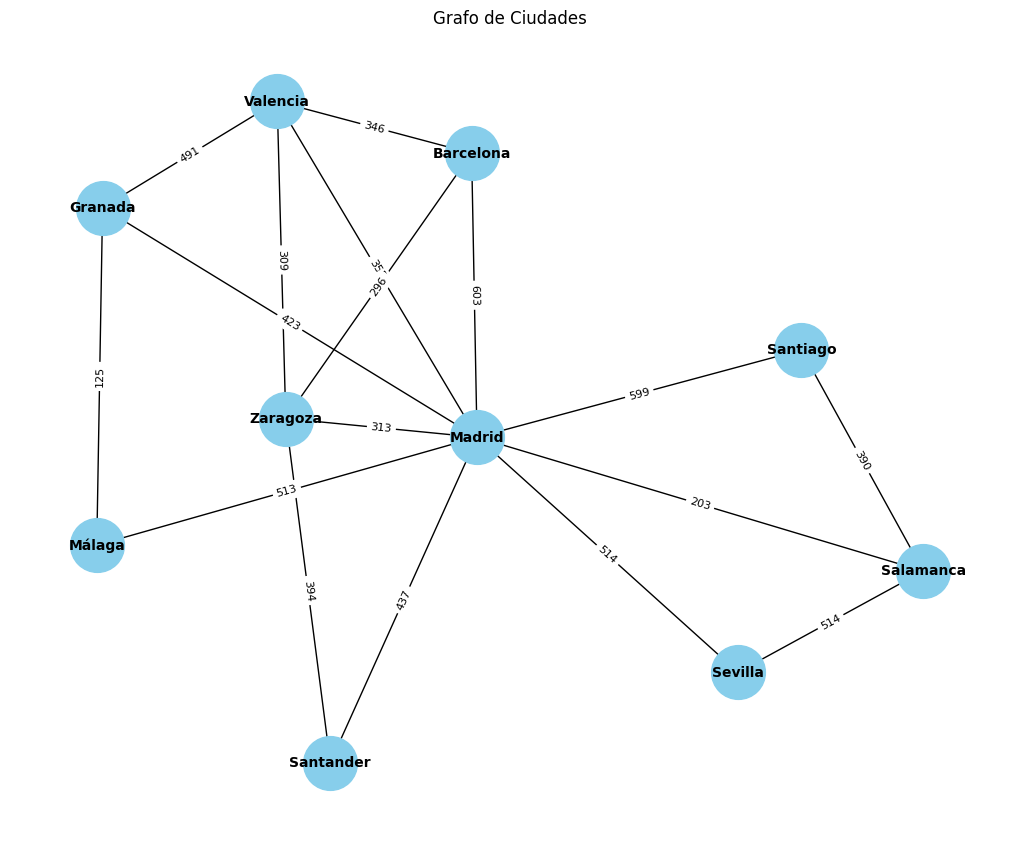

In [32]:
import networkx as nx

# Crear un grafo dirigido a partir del diccionario
G = nx.Graph()
for ciudad, conexiones in grafo.items():
  for conexion in conexiones:
    G.add_edge(ciudad, conexion[0], weight=conexion[1])

# Calcular posiciones de los nodos para una mejor visualización
pos = nx.spring_layout(G, seed=7)  # Fijar la semilla para consistencia

# Dibujar el grafo
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_size=8)
plt.title("Grafo de Ciudades")
plt.show()

Busqueda del camino mas corto de acuerdo al algoritmo de Costo Uniforme

In [33]:
# Función para encontrar el camino más corto usando el algoritmo de costo uniforme
def buscar_camino_costo_uniforme(grafo, inicio, objetivo):
    # Cola de prioridad para gestionar los nodos
    cola_prioridad = [(0, inicio, [])]
    visitados = set()

    while cola_prioridad:
        (costo, nodo_actual, camino) = heapq.heappop(cola_prioridad)

        if nodo_actual in visitados:
            continue

        camino = camino + [nodo_actual]
        visitados.add(nodo_actual)

        # Si hemos llegado al nodo objetivo, retornamos el costo y el camino
        if nodo_actual == objetivo:
            return costo, camino

        # Expandir los nodos adyacentes
        for (nodo_vecino, costo_vecino) in grafo.get(nodo_actual, []):
            if nodo_vecino not in visitados:
                heapq.heappush(cola_prioridad, (costo + costo_vecino, nodo_vecino, camino))

    return float("inf"), []

# Buscar el camino más corto de Málaga a Santiago
costo, camino = buscar_camino_costo_uniforme(grafo, 'Málaga', 'Santiago')
print(costo, camino)

1106 ['Málaga', 'Madrid', 'Salamanca', 'Santiago']


Graficamos el resultado

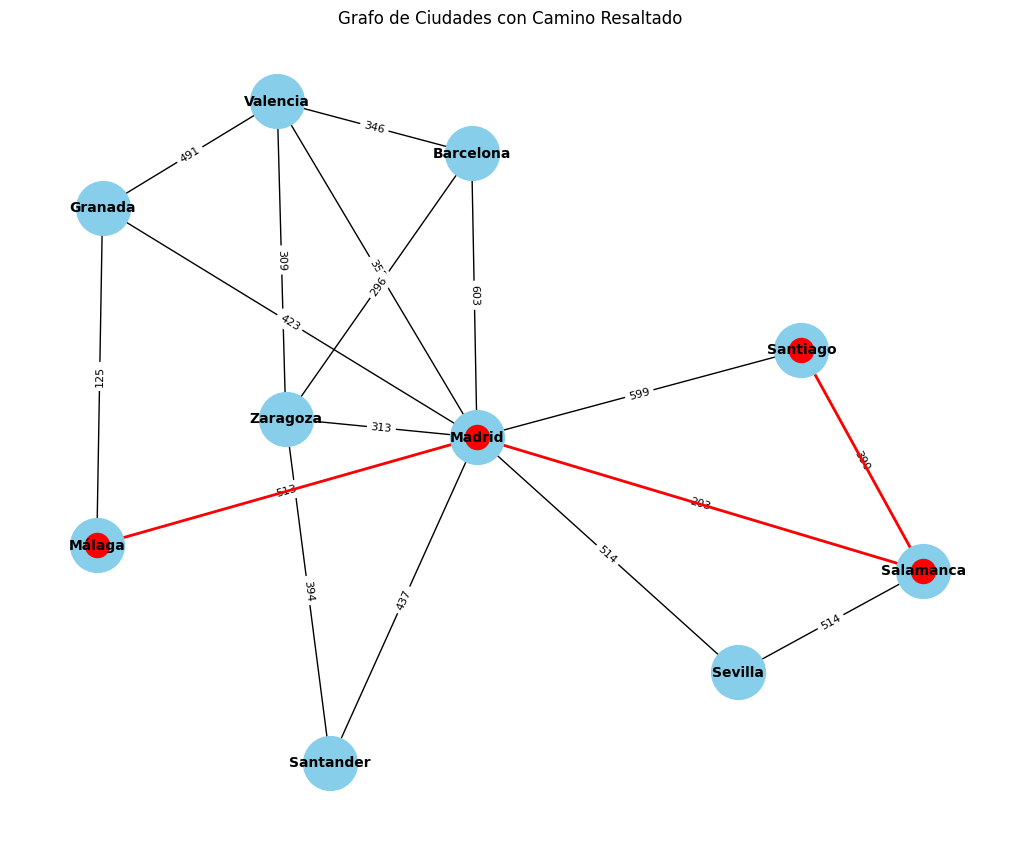

In [36]:
# Resaltar el camino encontrado en rojo
camino_nodos = camino
camino_aristas = [(camino[i], camino[i+1]) for i in range(len(camino)-1)]

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_size=8)

# Destacar nodos y aristas del camino
nx.draw_networkx_nodes(G, pos, nodelist=camino_nodos, node_color='red')
nx.draw_networkx_edges(G, pos, edgelist=camino_aristas, edge_color='red', width=2)

plt.title("Grafo de Ciudades con Camino Resaltado")
plt.show()

Resolvemos usando el algoritmo de DIJKSTRA

In [37]:
def dijkstra(grafo, inicio, objetivo):
    # Inicializar la cola de prioridad y la tabla de distancias
    cola_prioridad = [(0, inicio)]
    distancias = {nodo: float('inf') for nodo in grafo}
    distancias[inicio] = 0
    padres = {nodo: None for nodo in grafo}

    while cola_prioridad:
        costo_actual, nodo_actual = heapq.heappop(cola_prioridad)

        if nodo_actual == objetivo:
            break

        for vecino, costo in grafo[nodo_actual]:
            nueva_distancia = costo_actual + costo
            if nueva_distancia < distancias[vecino]:
                distancias[vecino] = nueva_distancia
                padres[vecino] = nodo_actual
                heapq.heappush(cola_prioridad, (nueva_distancia, vecino))

    # Reconstruir el camino desde el objetivo hasta el inicio
    camino = []
    nodo = objetivo
    while nodo is not None:
        camino.append(nodo)
        nodo = padres[nodo]
    camino.reverse()

    return distancias[objetivo], camino

# Buscar el camino más corto de Málaga a Santiago usando Dijkstra
costo_dijkstra, camino_dijkstra = dijkstra(grafo, 'Málaga', 'Santiago')
costo_dijkstra, camino_dijkstra

(1106, ['Málaga', 'Madrid', 'Salamanca', 'Santiago'])

Graficamos el resultado

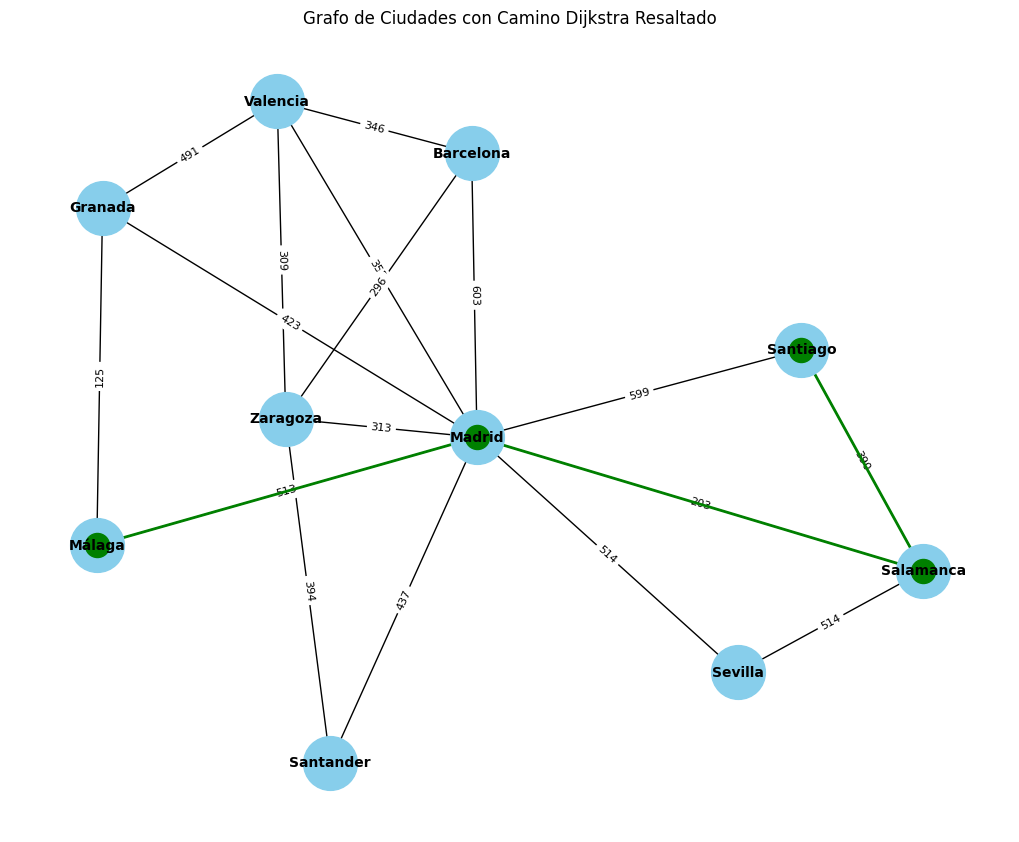

In [39]:
# Resaltar el camino encontrado en verde
camino_nodos_dijkstra = camino_dijkstra
camino_aristas_dijkstra = [(camino_dijkstra[i], camino_dijkstra[i+1]) for i in range(len(camino_dijkstra)-1)]

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_size=8)

# Destacar nodos y aristas del camino Dijkstra
nx.draw_networkx_nodes(G, pos, nodelist=camino_nodos_dijkstra, node_color='green')
nx.draw_networkx_edges(G, pos, edgelist=camino_aristas_dijkstra, edge_color='green', width=2)

plt.title("Grafo de Ciudades con Camino Dijkstra Resaltado")
plt.show()

Resolvemos usando el algoritmo de primero el mejor

In [40]:
def best_first_search(grafo, inicio, objetivo, heuristica):
    # Cola de prioridad basada en la heurística
    cola_prioridad = [(heuristica[inicio], inicio, [])]
    visitados = set()

    while cola_prioridad:
        _, nodo_actual, camino = heapq.heappop(cola_prioridad)

        if nodo_actual in visitados:
            continue

        camino = camino + [nodo_actual]
        visitados.add(nodo_actual)

        # Si hemos llegado al nodo objetivo, retornamos el camino
        if nodo_actual == objetivo:
            return camino

        # Expandir los nodos adyacentes
        for (nodo_vecino, _) in grafo.get(nodo_actual, []):
            if nodo_vecino not in visitados:
                heapq.heappush(cola_prioridad, (heuristica[nodo_vecino], nodo_vecino, camino))

    return []

# Distancias en línea recta hasta Santiago (heurística)
heuristica = {
    'Málaga': 737,
    'Sevilla': 633,
    'Granada': 737,
    'Madrid': 482,
    'Salamanca': 326,
    'Santander': 404,
    'Zaragoza': 658,
    'Barcelona': 876,
    'Valencia': 771,
    'Santiago': 0
}

# Buscar el camino más corto de Málaga a Santiago usando Best-First Search
camino_best_first = best_first_search(grafo, 'Málaga', 'Santiago', heuristica)
camino_best_first


['Málaga', 'Madrid', 'Santiago']

In [41]:
# Calcula la distancia total del camino encontrado por Best-First Search
distancia_total = 0
for i in range(len(camino_best_first) - 1):
  ciudad_actual = camino_best_first[i]
  ciudad_siguiente = camino_best_first[i + 1]
  for vecino, costo in grafo[ciudad_actual]:
    if vecino == ciudad_siguiente:
      distancia_total += costo
      break

print("Distancia total del camino encontrado por Best-First Search:", distancia_total)


Distancia total del camino encontrado por Best-First Search: 1112


Graficamos el resultado

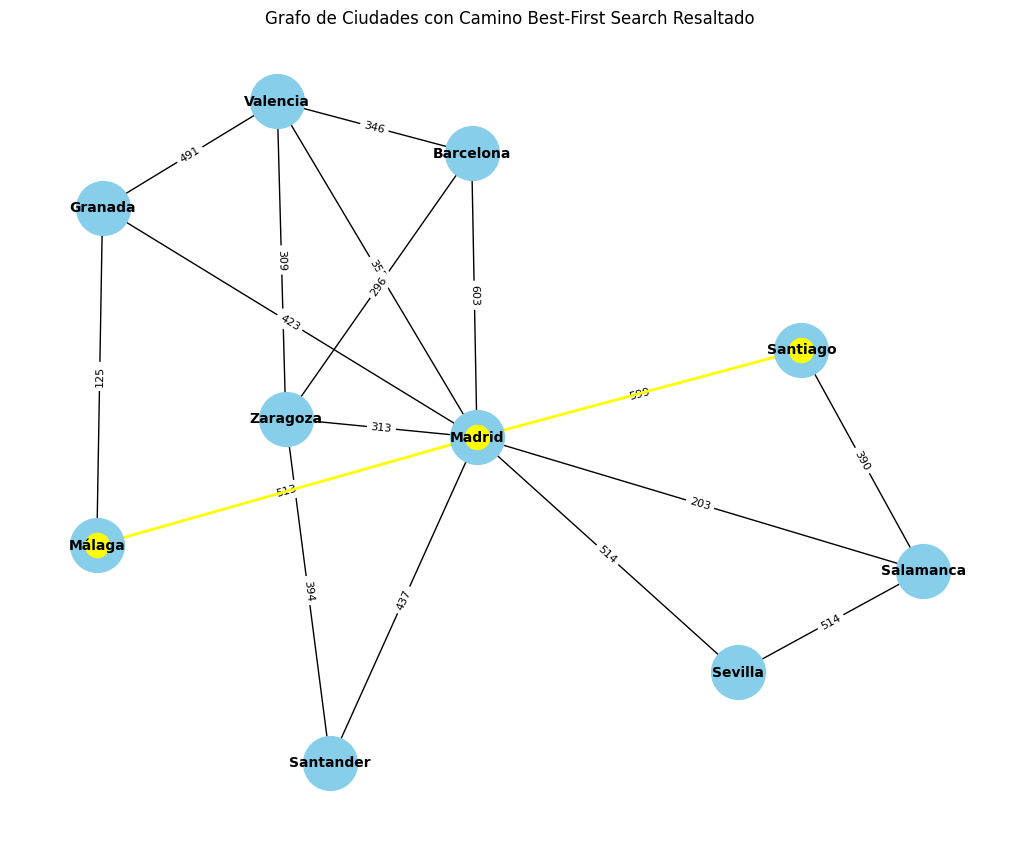

In [42]:
# Resaltar el camino encontrado en amarillo
camino_nodos_best_first = camino_best_first
camino_aristas_best_first = [(camino_best_first[i], camino_best_first[i+1]) for i in range(len(camino_best_first)-1)]

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_size=8)

# Destacar nodos y aristas del camino Best-First Search
nx.draw_networkx_nodes(G, pos, nodelist=camino_nodos_best_first, node_color='yellow')
nx.draw_networkx_edges(G, pos, edgelist=camino_aristas_best_first, edge_color='yellow', width=2)

plt.title("Grafo de Ciudades con Camino Best-First Search Resaltado")
plt.show()


Resolvemos usando el algoritmo de A*




In [43]:
def a_star(grafo, inicio, objetivo, heuristica):
    # Cola de prioridad basada en f(n) = g(n) + h(n)
    cola_prioridad = [(heuristica[inicio], 0, inicio, [])]
    visitados = set()

    while cola_prioridad:
        _, costo_actual, nodo_actual, camino = heapq.heappop(cola_prioridad)

        if nodo_actual in visitados:
            continue

        camino = camino + [nodo_actual]
        visitados.add(nodo_actual)

        # Si hemos llegado al nodo objetivo, retornamos el camino y el costo
        if nodo_actual == objetivo:
            return camino, costo_actual

        # Expandir los nodos adyacentes
        for (nodo_vecino, costo_vecino) in grafo.get(nodo_actual, []):
            if nodo_vecino not in visitados:
                costo_nuevo = costo_actual + costo_vecino
                heapq.heappush(cola_prioridad, (costo_nuevo + heuristica[nodo_vecino], costo_nuevo, nodo_vecino, camino))

    return [], float('inf')

# Buscar el camino más corto de Málaga a Santiago usando A*
camino_a_star, costo_a_star = a_star(grafo, 'Málaga', 'Santiago', heuristica)

print("Camino encontrado por A*:", camino_a_star)
print("Distancia total del camino encontrado por A*:", costo_a_star)


Camino encontrado por A*: ['Málaga', 'Madrid', 'Salamanca', 'Santiago']
Distancia total del camino encontrado por A*: 1106


Graficamos el resultado

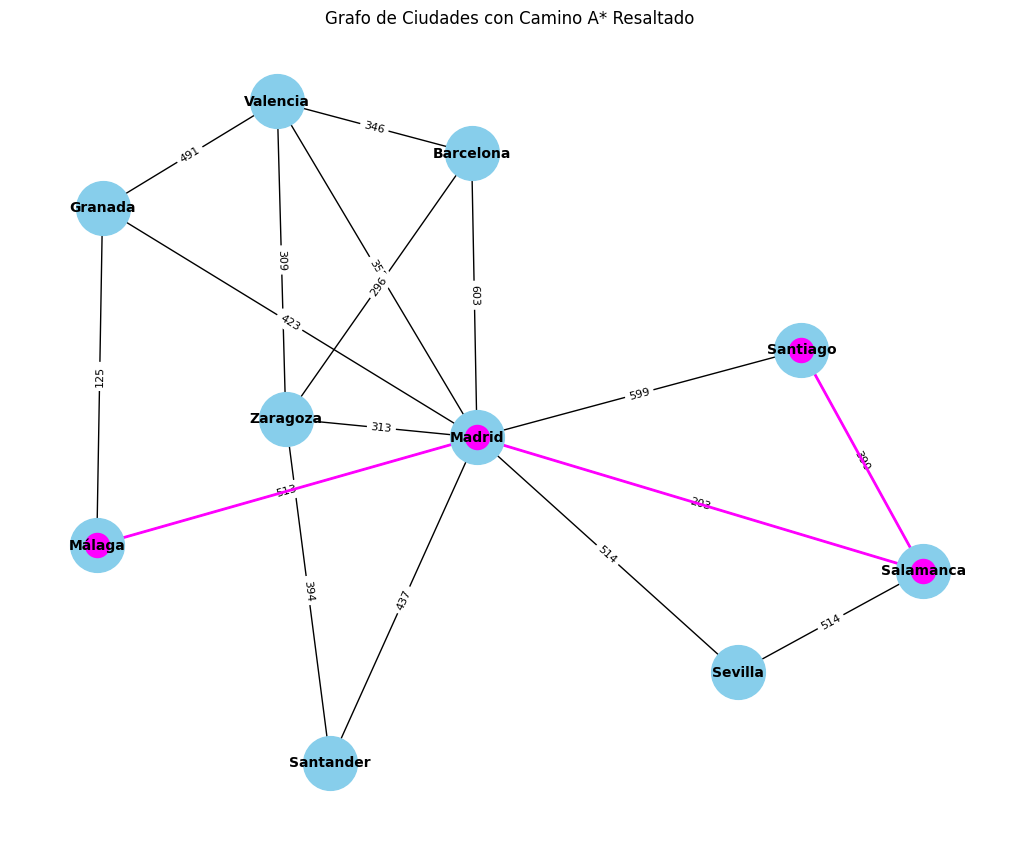

In [44]:
# Graficamos el resultado

# Resaltar el camino encontrado en magenta
camino_nodos_a_star = camino_a_star
camino_aristas_a_star = [(camino_a_star[i], camino_a_star[i+1]) for i in range(len(camino_a_star)-1)]

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_size=8)

# Destacar nodos y aristas del camino A*
nx.draw_networkx_nodes(G, pos, nodelist=camino_nodos_a_star, node_color='magenta')
nx.draw_networkx_edges(G, pos, edgelist=camino_aristas_a_star, edge_color='magenta', width=2)

plt.title("Grafo de Ciudades con Camino A* Resaltado")
plt.show()
